Імпорт бібліотек і завантаження CSV

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження
url = "https://raw.githubusercontent.com/ilchukjulia059-cyber/NeuroLabs/refs/heads/main/Lab1/water_potability.csv"
df = pd.read_csv(url)

# Перевірка перших рядків
print(df.head())

# Назви колонок
print("Назви колонок:", df.columns.tolist())

# Розмір датасету
print("Розмір датасету:", df.shape)

# Кількість пропусків
print("\nКількість пропусків по колонках:")
print(df.isnull().sum())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Назви колонок: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
Розмір да

Базова статистика

In [ ]:
# Описові статистики
print(df.describe())

# Розподіл класів Potability
print("\nРозподіл класів Potability:")
print(df['Potability'].value_counts())


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


Базова візуалізація

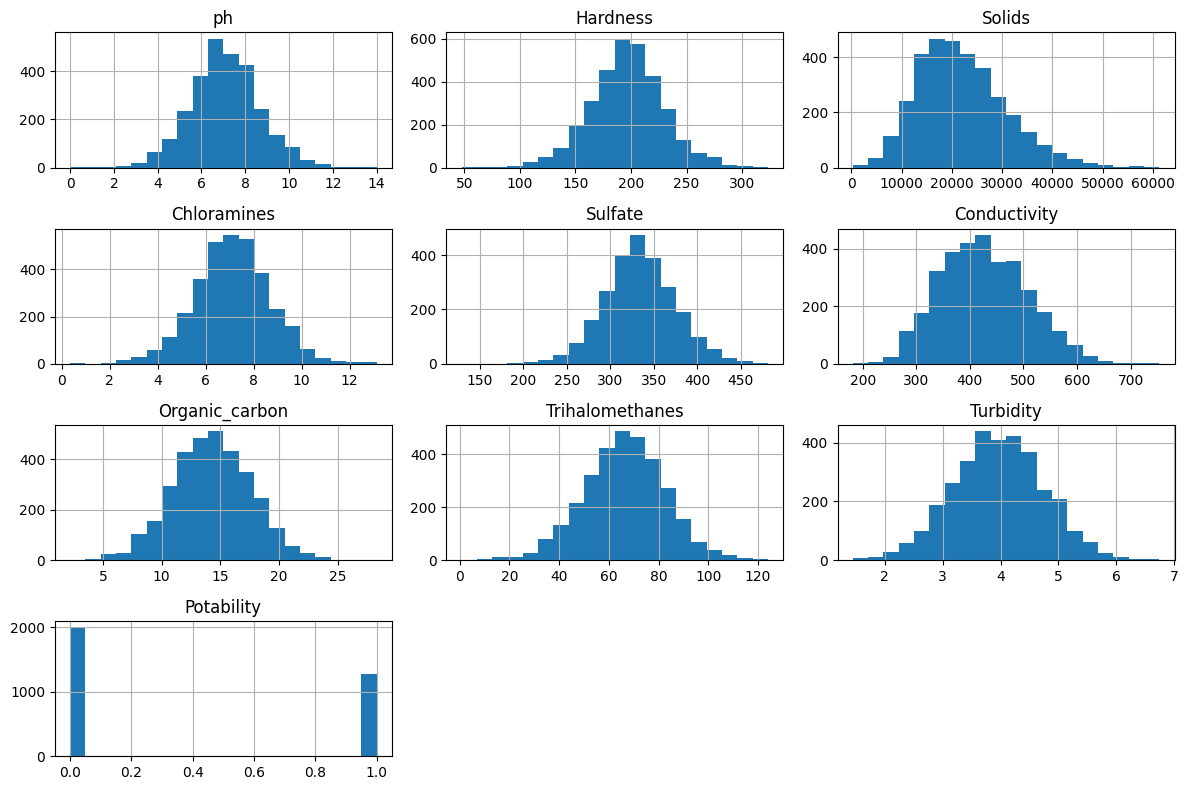

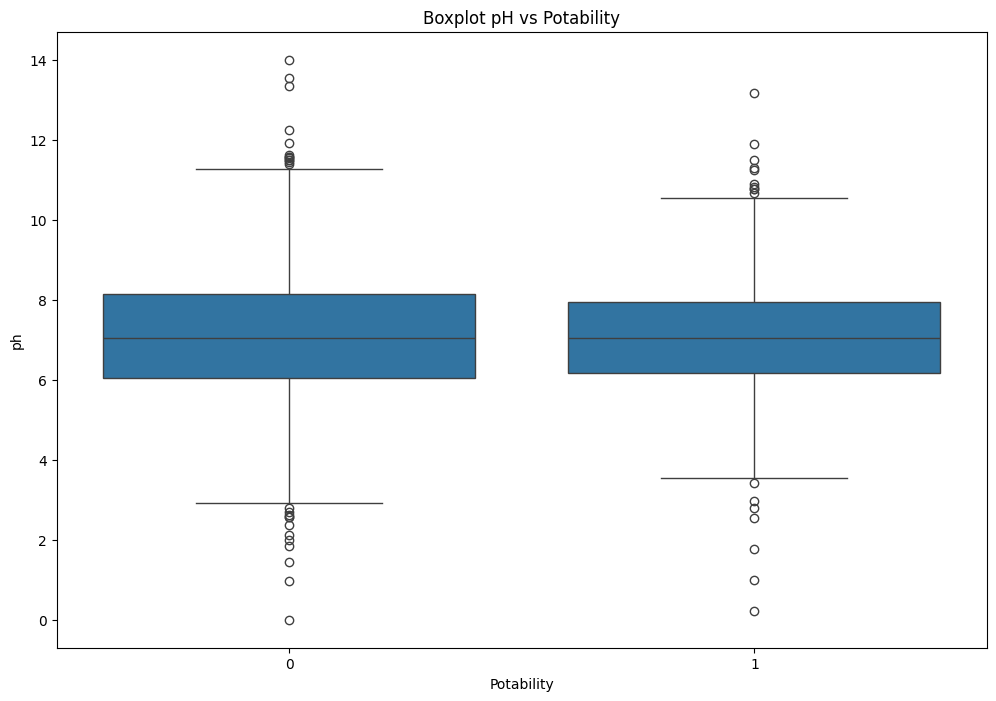

In [ ]:
# Гістограми числових ознак
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

# Boxplot приклад: pH відносно класу Potability
plt.figure(figsize=(12,8))
sns.boxplot(x='Potability', y='ph', data=df)
plt.title('Boxplot pH vs Potability')
plt.show()


Обробка пропусків

In [ ]:
# Перевіримо пропуски ще раз
print("Кількість пропусків по колонках:")
print(df.isnull().sum())

# Заповнимо пропуски медіаною кожної колонки
df.fillna(df.median(), inplace=True)

# Перевіримо, що всі пропуски заповнені
print("\nПісля заповнення пропусків:")
print(df.isnull().sum())


Кількість пропусків по колонках:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Після заповнення пропусків:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Heatmap кореляцій

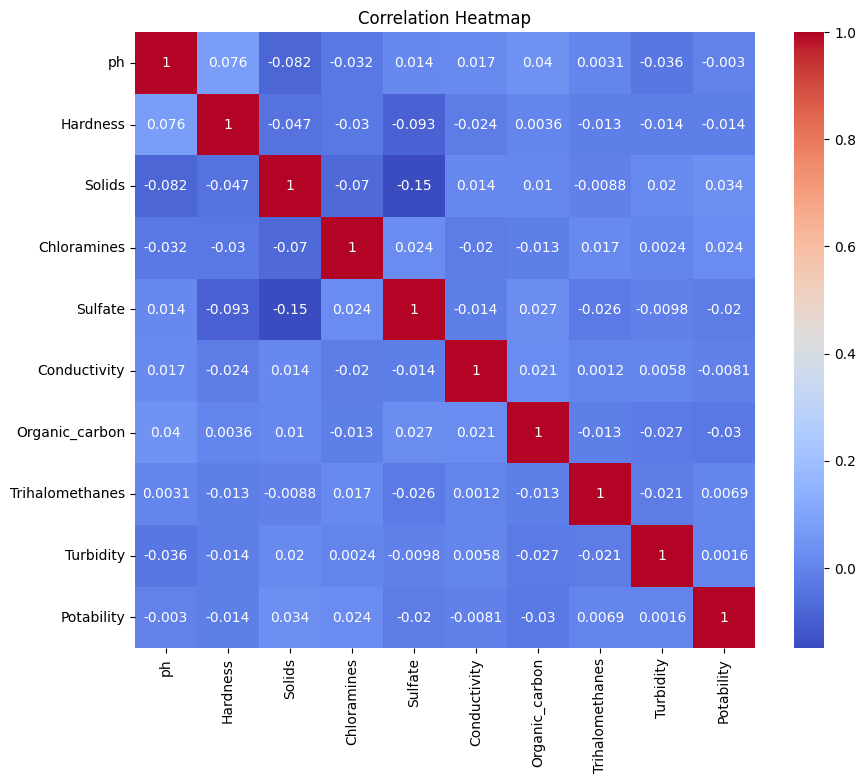

In [ ]:
# Кореляційна матриця
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Boxplot-и для всіх ознак по класах

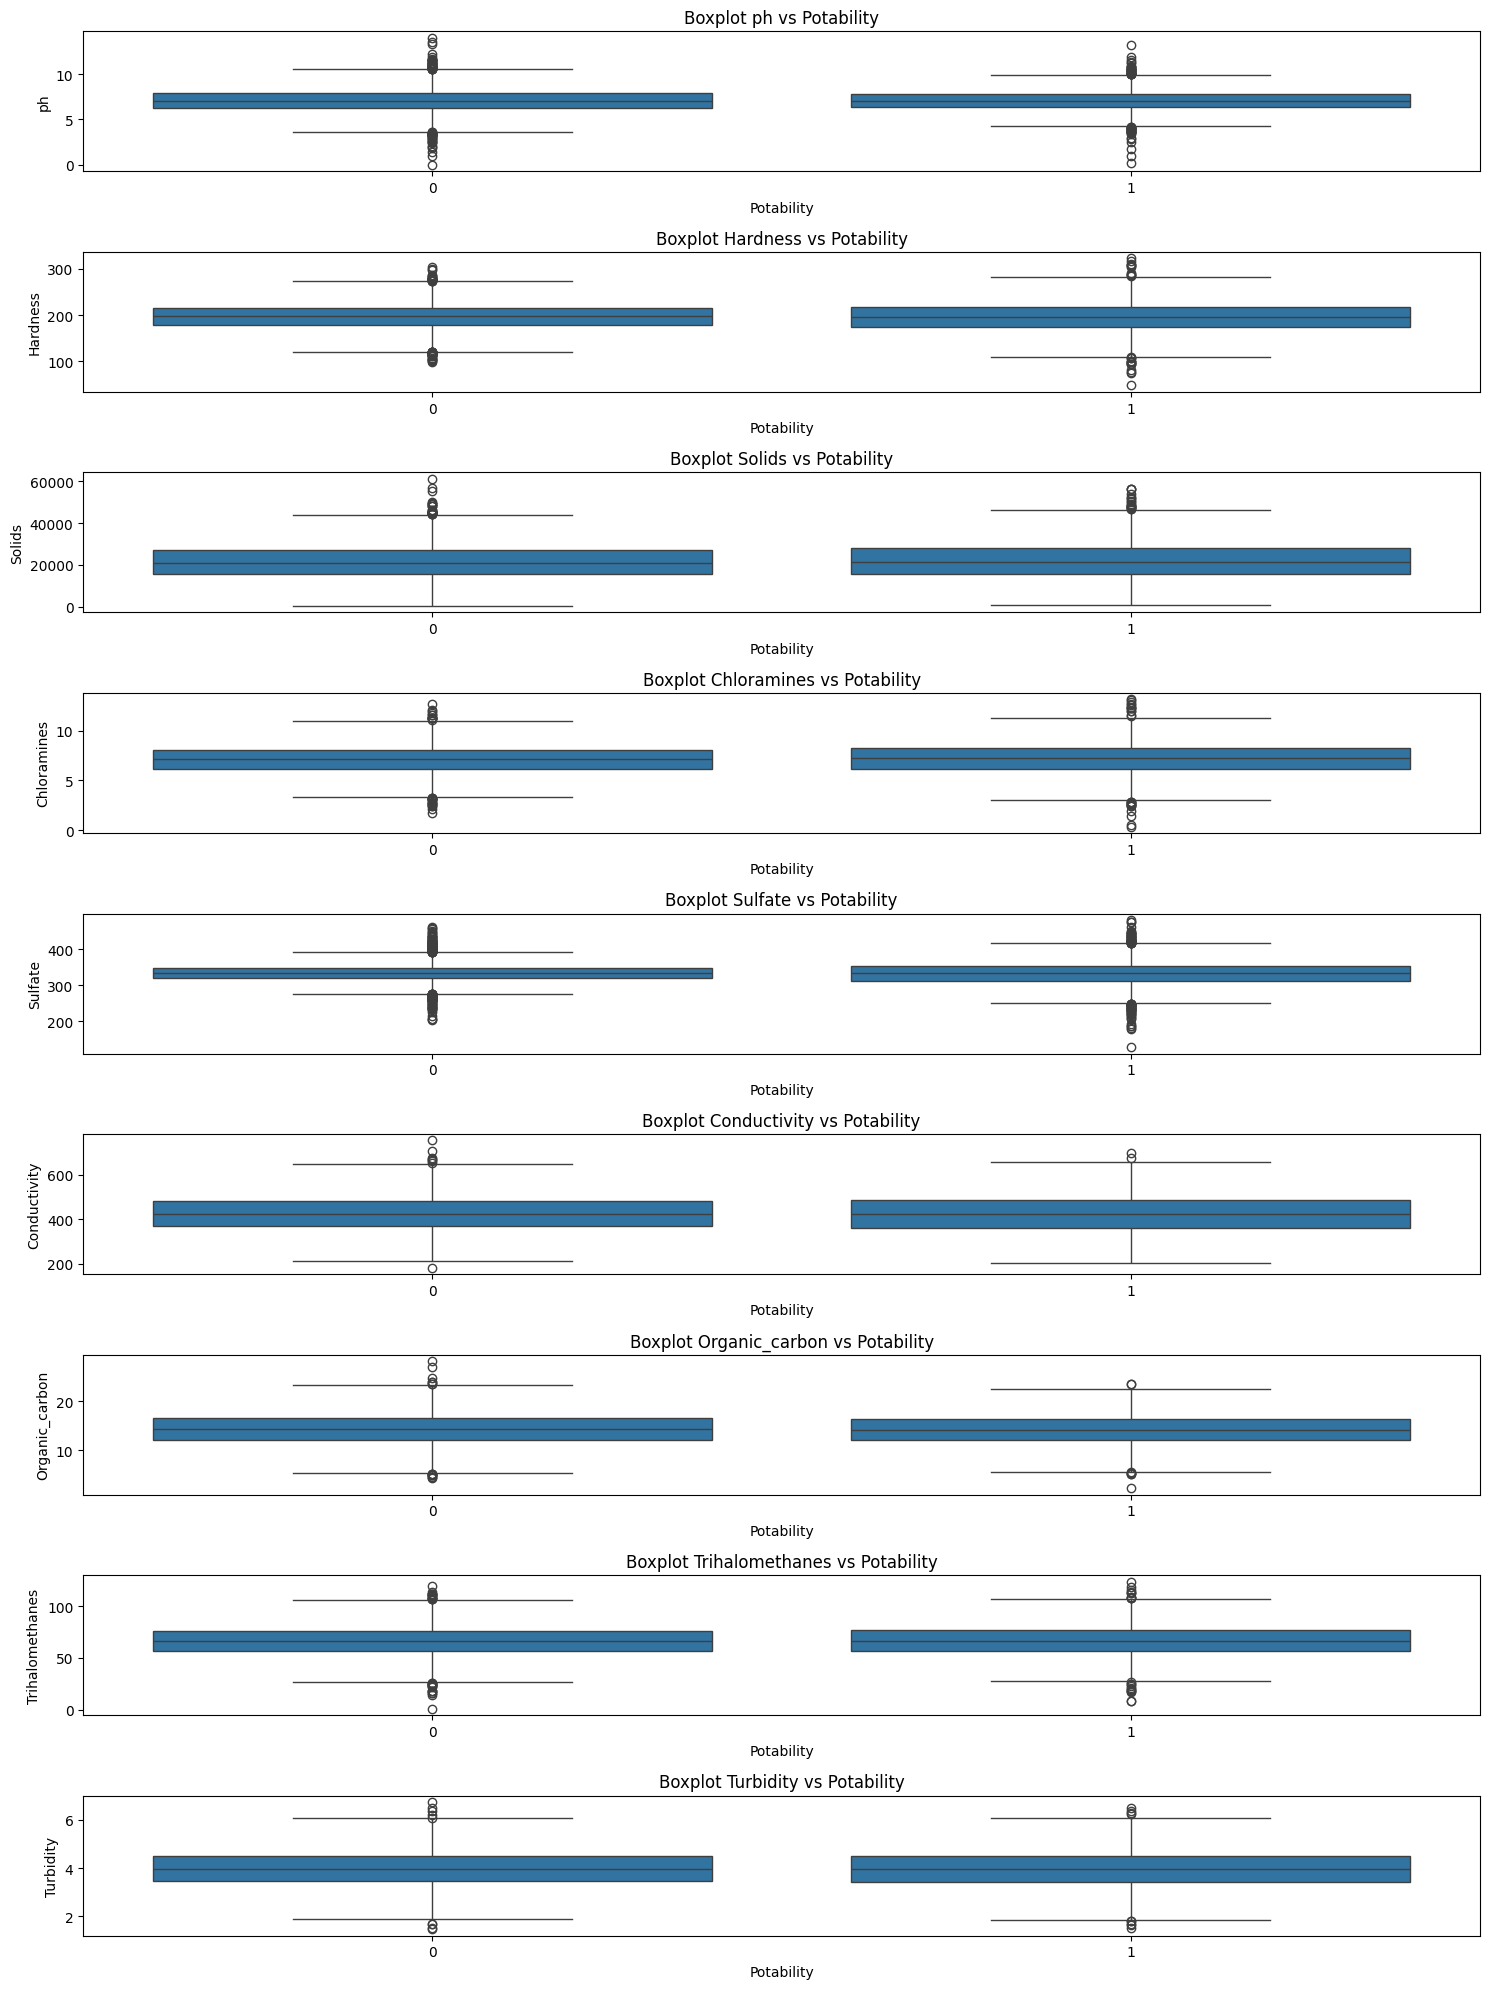

In [ ]:
features = df.columns[:-1]  # всі ознаки, крім Potability

plt.figure(figsize=(15,20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x='Potability', y=feature, data=df)
    plt.title(f'Boxplot {feature} vs Potability')
plt.tight_layout()
plt.show()


Нормалізація даних

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.drop('Potability', axis=1)
y = df['Potability']

X_scaled = scaler.fit_transform(X)

# Перетворимо назад у DataFrame для зручності
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())


         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.502625  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.579704      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.579704      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327  


Імпорт бібліотек для моделей, Розбиття на тренувальний та тестовий набір

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 80% тренувальні, 20% тестові
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



kNN з підбором k

In [ ]:
# Перевіримо кілька значень k
k_values = range(1, 21)
best_k = 1
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Найкраще k: {best_k}, Accuracy: {best_score:.3f}")

# Навчаємо kNN з оптимальним k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

print("kNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Найкраще k: 2, Accuracy: 0.649
kNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       412
           1       0.57      0.24      0.34       244

    accuracy                           0.65       656
   macro avg       0.62      0.57      0.55       656
weighted avg       0.63      0.65      0.60       656

Confusion Matrix:
[[367  45]
 [185  59]]


Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656

Confusion Matrix:
[[254 158]
 [120 124]]


SVM з GridSearch

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Найкращі параметри SVM:", grid.best_params_)
y_pred_svm = grid.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Найкращі параметри SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       412
           1       0.75      0.22      0.34       244

    accuracy                           0.68       656
   macro avg       0.71      0.59      0.56       656
weighted avg       0.70      0.68      0.62       656

Confusion Matrix:
[[394  18]
 [191  53]]


Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656

Confusion Matrix:
[[350  62]
 [152  92]]


AdaBoost

In [ ]:
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ab))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ab))


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.99      0.77       412
           1       0.68      0.05      0.10       244

    accuracy                           0.64       656
   macro avg       0.66      0.52      0.44       656
weighted avg       0.65      0.64      0.52       656

Confusion Matrix:
[[406   6]
 [231  13]]


Підсумкова таблиця Accuracy

           Model  Accuracy
0            SVM  0.681402
1  Random Forest  0.673780
2            kNN  0.649390
3       AdaBoost  0.638720
4  Decision Tree  0.576220


/tmp/ipython-input-1025184944.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=score_df, palette='viridis')


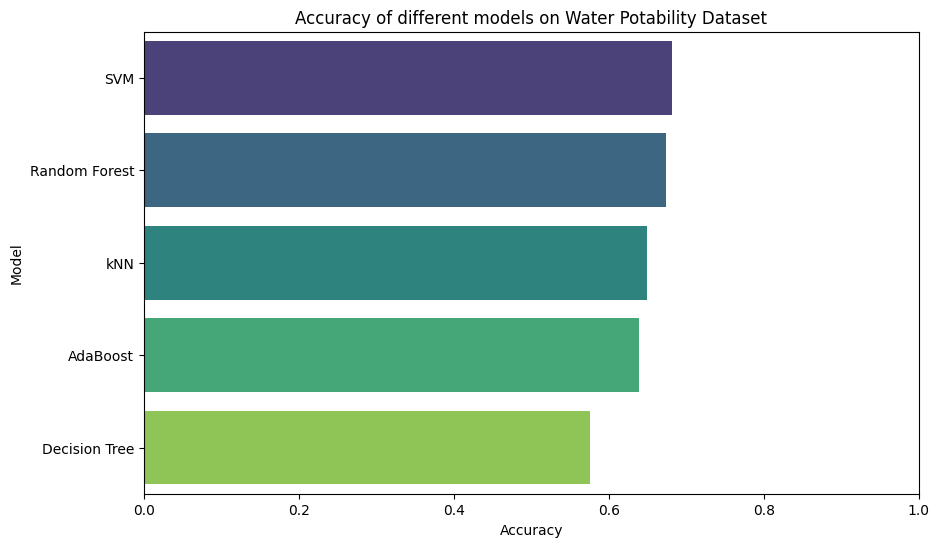

In [ ]:
# Створимо словник для збереження точності моделей
model_scores = {
    'kNN': knn_best.score(X_test, y_test),
    'Decision Tree': dt.score(X_test, y_test),
    'SVM': grid.score(X_test, y_test),
    'Random Forest': rf.score(X_test, y_test),
    'AdaBoost': ab.score(X_test, y_test)
}

# Перетворимо у DataFrame для зручності
score_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])
score_df = score_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(score_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=score_df, palette='viridis')
plt.title("Accuracy of different models on Water Potability Dataset")
plt.xlim(0,1)
plt.show()

